In [1]:
!pip install python-dotenv

In [2]:


from dotenv import load_dotenv
import os

from dotenv import load_dotenv
import os

load_dotenv('/content/api_key.env')


api_key = os.getenv('api_key')

In [3]:
api_key

'edbc04dfb0ca0bd1eab1426fcc2685c0'

In [4]:
import pandas as pd
import pandas_datareader as pdr

In [5]:
def get_fred_data(param_list, start_date, end_date):
    df = pdr.DataReader(param_list, "fred", start_date, end_date)
    return df.reset_index()

In [6]:
# PPIACO :        Producer Price Index by - Monthly
# PAYEMS :       non farm pay rolls
# UNRATE:             unemployemnt rate
#CES0500000003:             hourly wages
# CPILFESL:              inflation rate excluding food and energy
# FEDFUNDS:            Fed fund rate. Lagging indicator


series = ["PAYEMS", "UNRATE", "PPIACO", "CES0500000003", "CPILFESL","FEDFUNDS"]
# get data for series
df = get_fred_data(param_list=series, start_date="2015-01-01", end_date="2025-09-01")
df.set_index("DATE", drop=True, inplace=True)
print(df.shape)
df.tail(10)

(129, 6)


,PAYEMS,UNRATE,PPIACO,CES0500000003,CPILFESL,FEDFUNDS
DATE,,,,,,
2024-12-01,158942,4.1,253.423,35.68,323.296,4.48
2025-01-01,159053,4.0,257.360,35.83,324.739,4.33
2025-02-01,159155,4.2,259.498,35.90,325.475,4.33
2025-03-01,159275,4.2,258.525,36.02,325.659,4.33
2025-04-01,159433,4.2,258.392,36.08,326.430,4.33
2025-05-01,159452,4.3,258.678,36.23,326.854,4.33
2025-06-01,159439,4.1,260.491,36.31,327.600,4.33
2025-07-01,159511,4.3,262.358,36.43,328.656,4.33
2025-08-01,159485,4.3,262.119,36.58,329.793,4.33


In [7]:
import yfinance as yf

data = yf.download(tickers="GC=F", start="2015-01-01", end="2025-09-01", interval="1mo", auto_adjust=False)
# Print data
print(data.shape)
data.tail(10)

[*********************100%***********************]  1 of 1 completed

(109, 6)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2024-08-01,2493.800049,2493.800049,2527.300049,2367.399902,2446.699951,12103
2024-10-01,2738.300049,2738.300049,2789.000000,2602.500000,2631.399902,4495
2024-11-01,2657.000000,2657.000000,2756.000000,2554.199951,2745.500000,307970
2025-01-01,2812.500000,2812.500000,2838.000000,2617.300049,2633.000000,192980
2025-02-01,2836.800049,2836.800049,2957.899902,2780.899902,2818.199951,46632
2025-03-01,3122.800049,3122.800049,3132.500000,2863.399902,2872.699951,168341
2025-04-01,3305.000000,3305.000000,3485.600098,2949.699951,3129.699951,38612
2025-05-01,3288.899902,3288.899902,3430.899902,3125.000000,3272.899902,172644


In [8]:
# Make time zones non-timezone aware so as to allow the join
df.index = df.index.tz_localize(None)
data.index = data.index.tz_localize(None)

In [9]:
df2predict = pd.merge(df, data["Adj Close"], left_index=True, right_index=True)
print(df2predict.tail())
print(len(df2predict))
df2predict.isnull().sum()
df2predict = df2predict.dropna()

print("Print rows remaining after removed missing values {}".format(len(df2predict)))

            PAYEMS  UNRATE   PPIACO  CES0500000003  CPILFESL  FEDFUNDS  \
2025-03-01  159275     4.2  258.525          36.02   325.659      4.33   
2025-04-01  159433     4.2  258.392          36.08   326.430      4.33   
2025-05-01  159452     4.3  258.678          36.23   326.854      4.33   
2025-07-01  159511     4.3  262.358          36.43   328.656      4.33   
2025-08-01  159485     4.3  262.119          36.58   329.793      4.33   

                   GC=F  
2025-03-01  3122.800049  
2025-04-01  3305.000000  
2025-05-01  3288.899902  
2025-07-01  3293.199951  
2025-08-01  3473.699951  
109
Print rows remaining after removed missing values 109


In [10]:
name =  {"PPIACO" :"Producer Price Index by - Monthly",
          "PAYEMS" :"non farm pay rolls",
              "UNRATE":"unemployemnt rate",
              "CES0500000003":"hourly wages",
              "CPILFESL":"inflation rate excluding food and energy",
              "FEDFUNDS":"Fed fund rate. Lagging indicator",
              "GC=F":"Gold futures"}

In [11]:
df2predict=df2predict.rename(name, axis=1)

In [12]:
df2predict.tail()

,non farm pay rolls,unemployemnt rate,Producer Price Index by - Monthly,hourly wages,inflation rate excluding food and energy,Fed fund rate. Lagging indicator,Gold futures
2025-03-01,159275,4.2,258.525,36.02,325.659,4.33,3122.800049
2025-04-01,159433,4.2,258.392,36.08,326.430,4.33,3305.000000
2025-05-01,159452,4.3,258.678,36.23,326.854,4.33,3288.899902
2025-07-01,159511,4.3,262.358,36.43,328.656,4.33,3293.199951
2025-08-01,159485,4.3,262.119,36.58,329.793,4.33,3473.699951


In [13]:
# Store to csv
#path2copy = "../../data"
df2predict.to_csv("Predict.csv", index=True, index_label="Date")

In [51]:
# read in pre-stored data

df2predict = pd.read_csv("Predict.csv")
df2predict.set_index("Date", drop=True, inplace=True)

# Quick check that the data looks familiar.
df2predict.tail()

,non farm pay rolls,unemployemnt rate,Producer Price Index by - Monthly,hourly wages,inflation rate excluding food and energy,Fed fund rate. Lagging indicator,Gold futures
Date,,,,,,,
2025-03-01,159275,4.2,258.525,36.02,325.659,4.33,3122.800049
2025-04-01,159433,4.2,258.392,36.08,326.430,4.33,3305.000000
2025-05-01,159452,4.3,258.678,36.23,326.854,4.33,3288.899902
2025-07-01,159511,4.3,262.358,36.43,328.656,4.33,3293.199951
2025-08-01,159485,4.3,262.119,36.58,329.793,4.33,3473.699951


In [52]:
series = df2predict.columns.to_list()
series

['non farm pay rolls',
 'unemployemnt rate',
 'Producer Price Index by - Monthly',
 'hourly wages',
 'inflation rate excluding food and energy',
 'Fed fund rate. Lagging indicator',
 'Gold futures']

In [53]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
scale_model = scaler.fit(df2predict[series])
df2predict[series] = scale_model.transform(df2predict[series])
df2predict.tail()

,non farm pay rolls,unemployemnt rate,Producer Price Index by - Monthly,hourly wages,inflation rate excluding food and energy,Fed fund rate. Lagging indicator,Gold futures
Date,,,,,,,
2025-03-01,0.991886,0.070175,0.780437,0.952663,0.954057,0.810606,0.854603
2025-04-01,0.997318,0.070175,0.779093,0.957735,0.962626,0.810606,0.930099
2025-05-01,0.997972,0.078947,0.781983,0.970414,0.967338,0.810606,0.923428
2025-07-01,1.000000,0.078947,0.819173,0.987320,0.987364,0.810606,0.925209
2025-08-01,0.999106,0.078947,0.816758,1.000000,1.000000,0.810606,1.000000


In [54]:

# % change for just the target column
df2predict["Adj Close"] = df2predict["Gold futures"].pct_change()

# Drop any missing values
df2predict.dropna(inplace=True)

# Glimpse of data
df2predict.head()

,non farm pay rolls,unemployemnt rate,Producer Price Index by - Monthly,hourly wages,inflation rate excluding food and energy,Fed fund rate. Lagging indicator,Gold futures,Adj Close
Date,,,,,,,,
2015-04-01,0.370337,0.175439,0.097018,0.011834,0.017059,0.013258,0.050593,-0.440422
2015-05-01,0.382095,0.192982,0.122283,0.018597,0.020860,0.013258,0.053493,0.057330
2015-06-01,0.387974,0.166667,0.136431,0.018597,0.025038,0.015152,0.046076,-0.138652
2015-07-01,0.397669,0.157895,0.127336,0.021978,0.030606,0.015152,0.014337,-0.688849
2015-08-01,0.402276,0.149123,0.107124,0.028740,0.033407,0.017045,0.029543,1.060693


In [55]:
df2predict.shape

(108, 8)

In [56]:
import matplotlib.pyplot as plt
import numpy as np

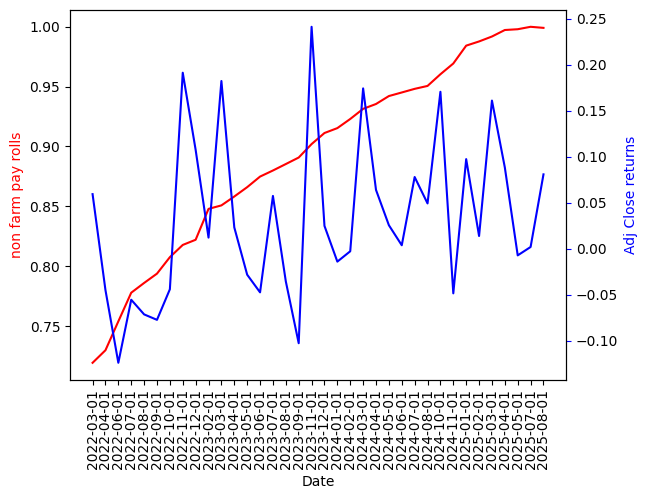

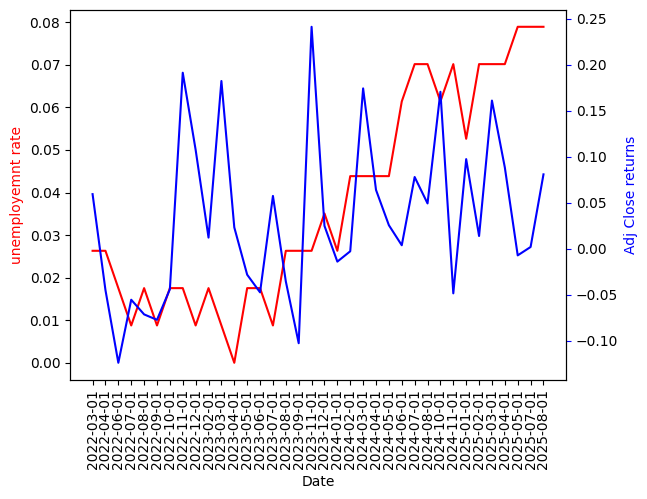

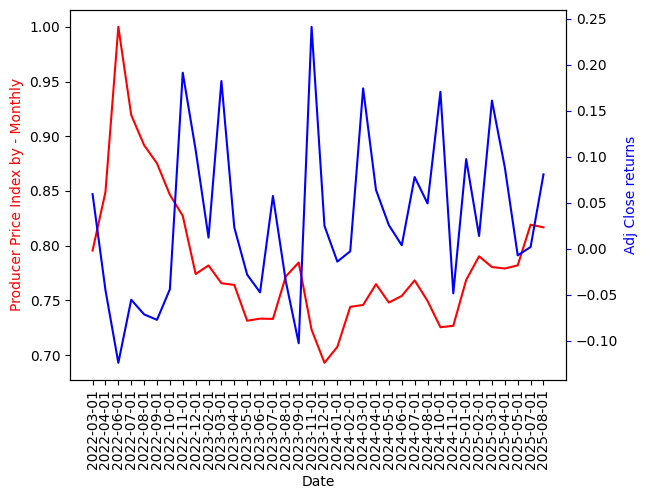

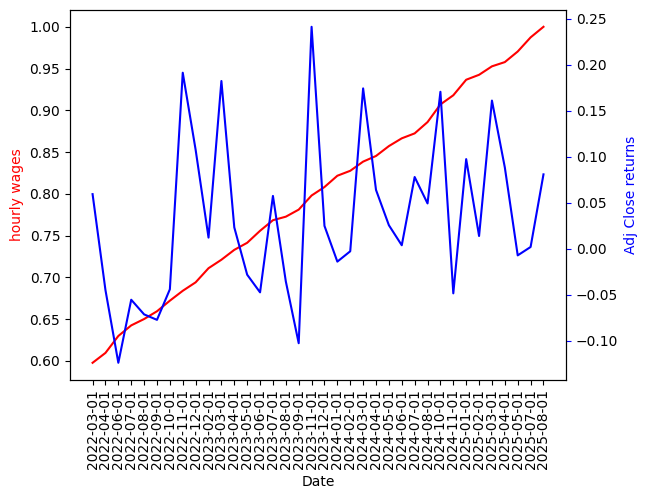

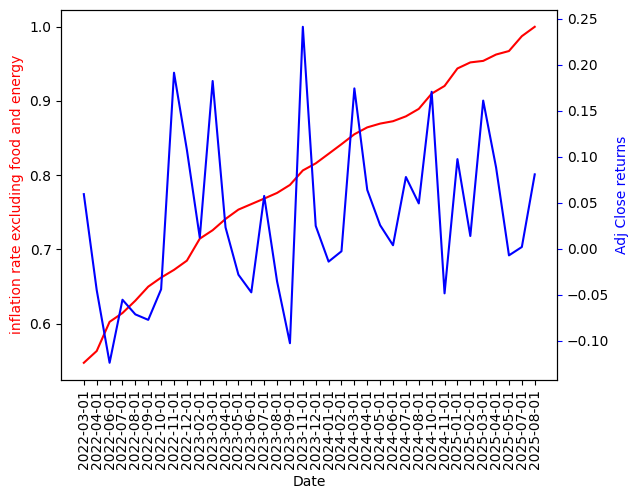

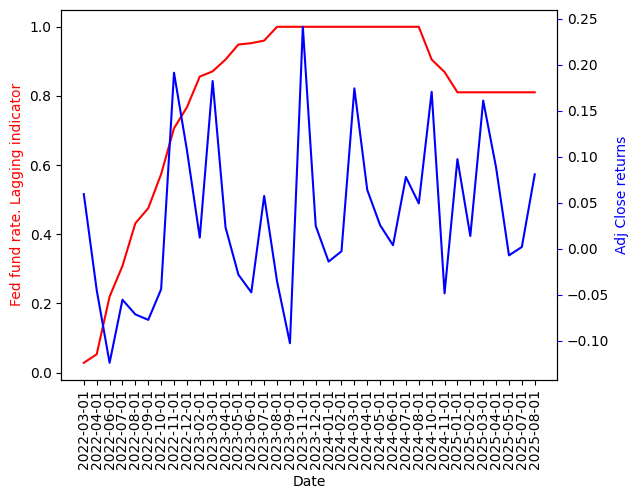

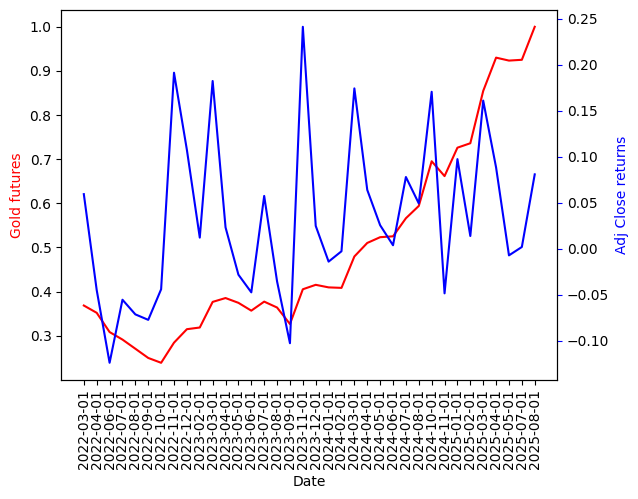

In [57]:
target = "Adj Close"
# 4 years
n_pts = 36

for j in np.arange(len(series)):
    # Check the lag

    var = series[j]
    # Define Data
    # choose sample of points to avoid clutter in plot
    df2plot = df2predict.iloc[len(df2predict) - n_pts : len(df2predict),]  # noQA E203
    x = df2plot.index
    data_1 = df2plot[var]
    data_2 = df2plot[target]

    # Create Plot

    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Date")
    ax1.set_ylabel(var, color="red")
    ax1.plot(x, data_1, color="red")
    plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 45-degrees
    # Adding Twin Axes

    ax2 = ax1.twinx()
    ax2.plot(x, data_2, color="blue")

    # Add label

    ax2.set_ylabel("Adj Close returns", color="blue")
    ax2.tick_params(axis="y", color="blue")

    # Show plot

    plt.show()

In [38]:
import tensorflow as tf

In [58]:
X = df2predict[series].values
y = df2predict["Adj Close"].values

In [59]:
df2predict[series]

,non farm pay rolls,unemployemnt rate,Producer Price Index by - Monthly,hourly wages,inflation rate excluding food and energy,Fed fund rate. Lagging indicator,Gold futures
Date,,,,,,,
2015-04-01,0.370337,0.175439,0.097018,0.011834,0.017059,0.013258,0.050593
2015-05-01,0.382095,0.192982,0.122283,0.018597,0.020860,0.013258,0.053493
2015-06-01,0.387974,0.166667,0.136431,0.018597,0.025038,0.015152,0.046076
2015-07-01,0.397669,0.157895,0.127336,0.021978,0.030606,0.015152,0.014337
2015-08-01,0.402276,0.149123,0.107124,0.028740,0.033407,0.017045,0.029543
...,...,...,...,...,...,...,...
2025-03-01,0.991886,0.070175,0.780437,0.952663,0.954057,0.810606,0.854603
2025-04-01,0.997318,0.070175,0.779093,0.957735,0.962626,0.810606,0.930099
2025-05-01,0.997972,0.078947,0.781983,0.970414,0.967338,0.810606,0.923428


In [60]:
#cutoff split
test_sz = 0.2
train_sz = int((1 - test_sz) * len(X))
X_train = X[:train_sz]
y_train = y[:train_sz]
X_test = X[train_sz:]
y_test = y[train_sz:]
len(X_train), len(X_test)

(86, 22)

In [61]:
# Build the model
# tf.keras: The Keras API integrated into TensorFlow 2

tf.random.set_seed(42)  # first we set random seed
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])  # The output layer

# We compile the model specifying loss, and optimizer.
model.compile(
    loss=tf.keras.losses.mae,  # Los function is MAE, mean absolute error.
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.01, momentum=0.9
    ),  # stochastic Gradient descent Optimizer
    metrics=["mae"],
)  # performance metric is MAE

model.fit(X_train, y_train, epochs=10, batch_size=8)  # epoch and batch size specified

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: inf - mae: inf        
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: inf - mae: inf       


In [43]:
preds = model.predict(X_test)

mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_true=y_test, y_pred=preds.squeeze())
mae = mae_metric.result().numpy()

mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_true=y_test, y_pred=preds.squeeze())
mse = mse_metric.result().numpy()

mae, mse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


(np.float32(0.09322663), np.float32(0.014404229))

In [83]:
# Improve our model. More epochs, added extra layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            8, activation="sigmoid", input_shape=(X_train.shape[1],)
        ),  # added extra layer
        tf.keras.layers.Dense(4, activation="sigmoid"),  # added extra layer
        tf.keras.layers.Dense(1),
    ]
)
model_1.compile(
    loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"]
)
model_1.fit(X_train, y_train, epochs=1000, batch_size=6, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# performance
preds = model_1.predict(X_test)

mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_true=y_test, y_pred=preds.squeeze())
mae = mae_metric.result().numpy()

mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_true=y_test, y_pred=preds.squeeze())
mse = mse_metric.result().numpy()

mae, mse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


(np.float32(0.06253536), np.float32(0.006357688))

In [85]:
print(f"{(mae*100):.2f}%")

6.25%


In [86]:
df_preds = pd.concat([pd.DataFrame(y_test), pd.DataFrame(preds.squeeze())], axis=1)
df_preds.columns = ["y_test", "preds"]
df_preds.head(20)

,y_test,preds
0,0.057389,0.021836
1,-0.035487,0.021832
2,-0.102631,0.014281
3,0.241178,0.031218
4,0.024852,0.035373
5,-0.013971,0.032098
6,-0.002732,0.031753
7,0.174244,0.043640
8,0.063953,0.047636
9,0.025587,0.050291


In [87]:
actual_returns = df_preds['y_test']
predicted_returns = df_preds['preds']
print("Actual returns head:\n", actual_returns.head())
print("\nPredicted returns head:\n", predicted_returns.head())

Actual returns head:
 0    0.057389
1   -0.035487
2   -0.102631
3    0.241178
4    0.024852
Name: y_test, dtype: float64

Predicted returns head:
 0    0.021836
1    0.021832
2    0.014281
3    0.031218
4    0.035373
Name: preds, dtype: float32


In [88]:
initial_capital = 10000

# Trading Strategy
portfolio_trading = initial_capital
portfolio_values_trading = [initial_capital]

for i in range(len(predicted_returns)):
    if predicted_returns.iloc[i] > 0:  # If model predicts positive return, buy with lot size 0.5
        portfolio_trading *= (1 + (actual_returns.iloc[i] * 0.5))

    # Else (predicted_returns == 0), hold cash, portfolio_trading remains unchanged
    portfolio_values_trading.append(portfolio_trading)

# Buy and Hold Strategy
portfolio_buy_hold = initial_capital
portfolio_values_buy_hold = [initial_capital]

for i in range(len(actual_returns)):
    portfolio_buy_hold *= (1 + (actual_returns.iloc[i] * 0.1)) # Apply lot size 0.1
    portfolio_values_buy_hold.append(portfolio_buy_hold)

print(f"Final Portfolio Value (Trading Strategy): ${portfolio_trading:,.2f}")
print(f"Profit/Loss (Trading Strategy): ${(portfolio_trading - initial_capital):,.2f}")
print(f"\nFinal Portfolio Value (Buy and Hold Strategy): ${portfolio_buy_hold:,.2f}")
print(f"Profit/Loss (Buy and Hold Strategy): ${(portfolio_buy_hold - initial_capital):,.2f}")

Final Portfolio Value (Trading Strategy): $17,110.93
Profit/Loss (Trading Strategy): $7,110.93

Final Portfolio Value (Buy and Hold Strategy): $11,176.00
Profit/Loss (Buy and Hold Strategy): $1,176.00
